In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import minimize_scalar

import astropy.units as u
import astropy.constants as const

# from tqdm import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2


# from matplotlib import cm
# import colormaps
# col = [ colormaps.viridis(x) for x in np.linspace(0, 1, 20) ]


plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize']=14
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.frameon'] = False
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['lines.linewidth'] = 2.
#from matplotlib import rc
# rc('text', usetex=True)

from scipy.spatial import distance_matrix
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

desy_o = '#F28E00'
desy_b = '#00A6EB'
desy_g = '#777777'

In [2]:
rc('text', usetex=False)
# plt.xkcd()


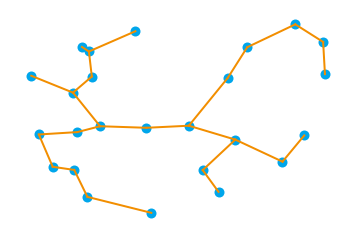

In [14]:
X = np.random.rand(25, 2)
x = X.T[0]
y = X.T[1]
DistanceMatrix = distance_matrix(X, X)
M = csr_matrix(np.triu(DistanceMatrix))
Tcsr = minimum_spanning_tree(M)
MyMask = Tcsr.toarray()!=0

fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(x, y, lw=0, s=100, color=desy_b)
for i in range(len(MyMask)):
    for j in range(len(MyMask)):
        if  MyMask[i][j]:
            ax.plot(np.append(x[i], x[j]), np.append(y[i], y[j]), color=desy_o,)              
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks_position('right')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('plots/MinimalSpanningTree.pdf')
plt.show()